# Used Car Price Prediction using Multi-layer Perceptron Regression
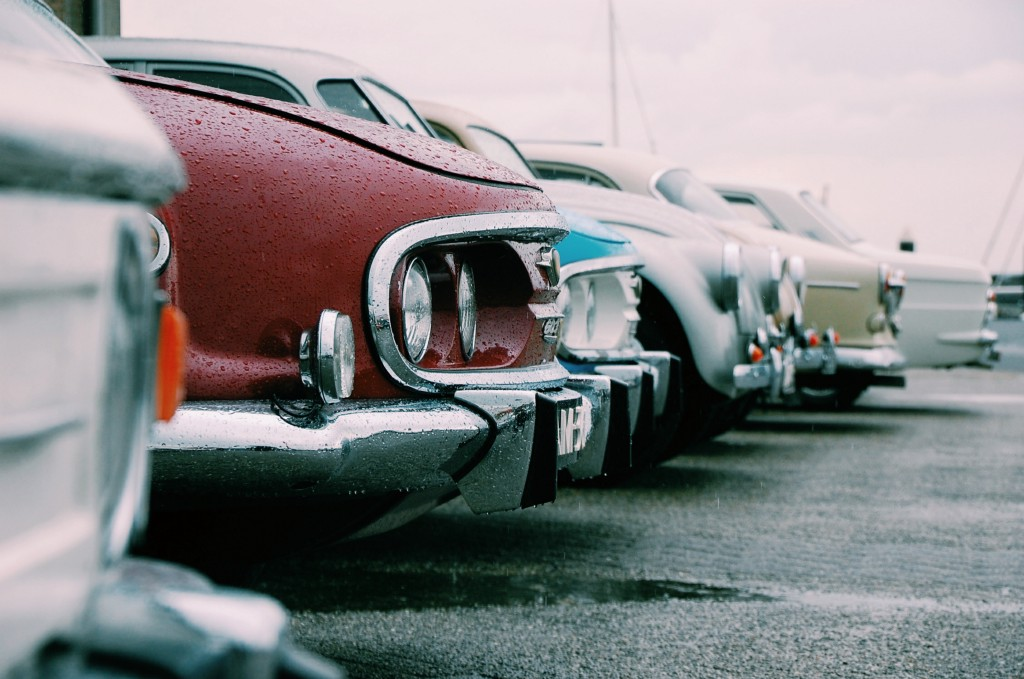

In [100]:
import numpy as np
import pandas as pd
import plotly.express as px

# Reading the Dataset

In [101]:
df = pd.read_csv("train.csv")
df.head()

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

In [102]:
df.shape

(1000, 12)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [104]:
df.describe().style.background_gradient(cmap = 'Greens')

# Data Cleaning

<AxesSubplot:>

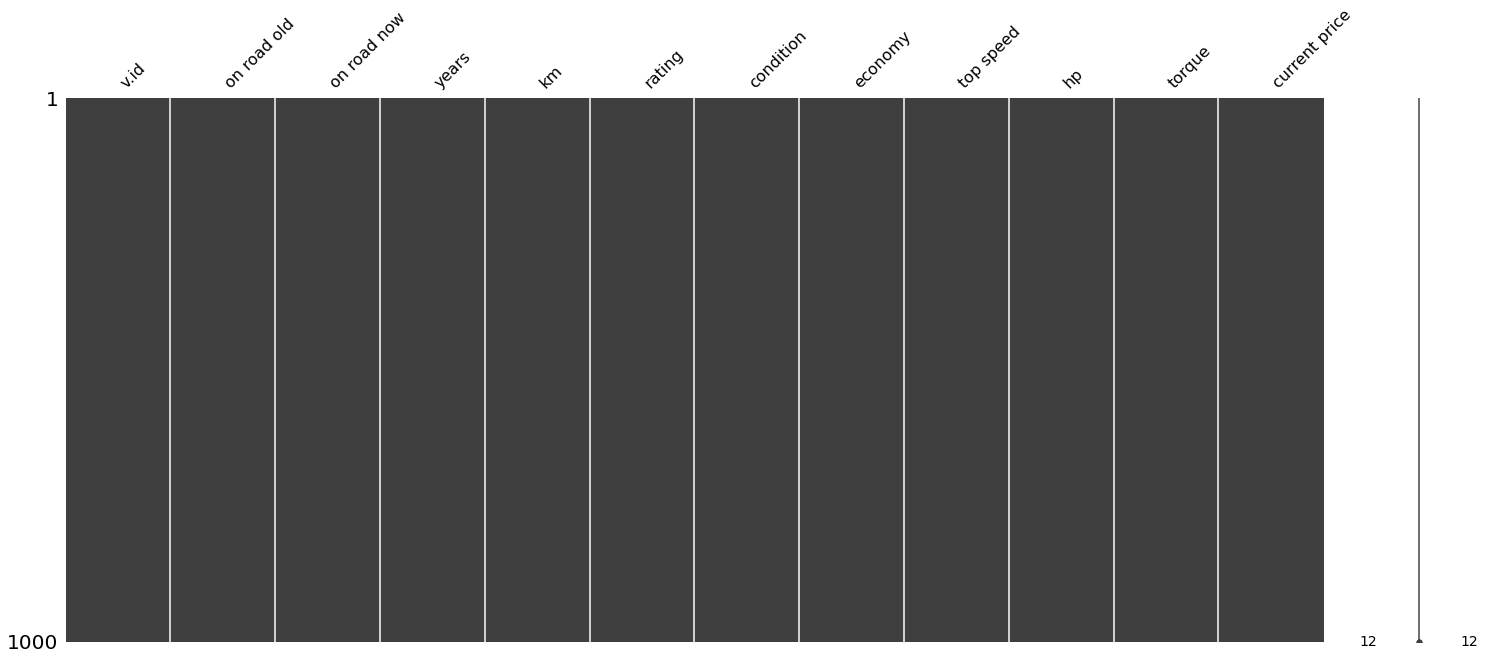

In [105]:
import missingno as m
m.matrix(df)

### Data is already Cleaned

In [106]:
df.head()

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

# Data Analysis

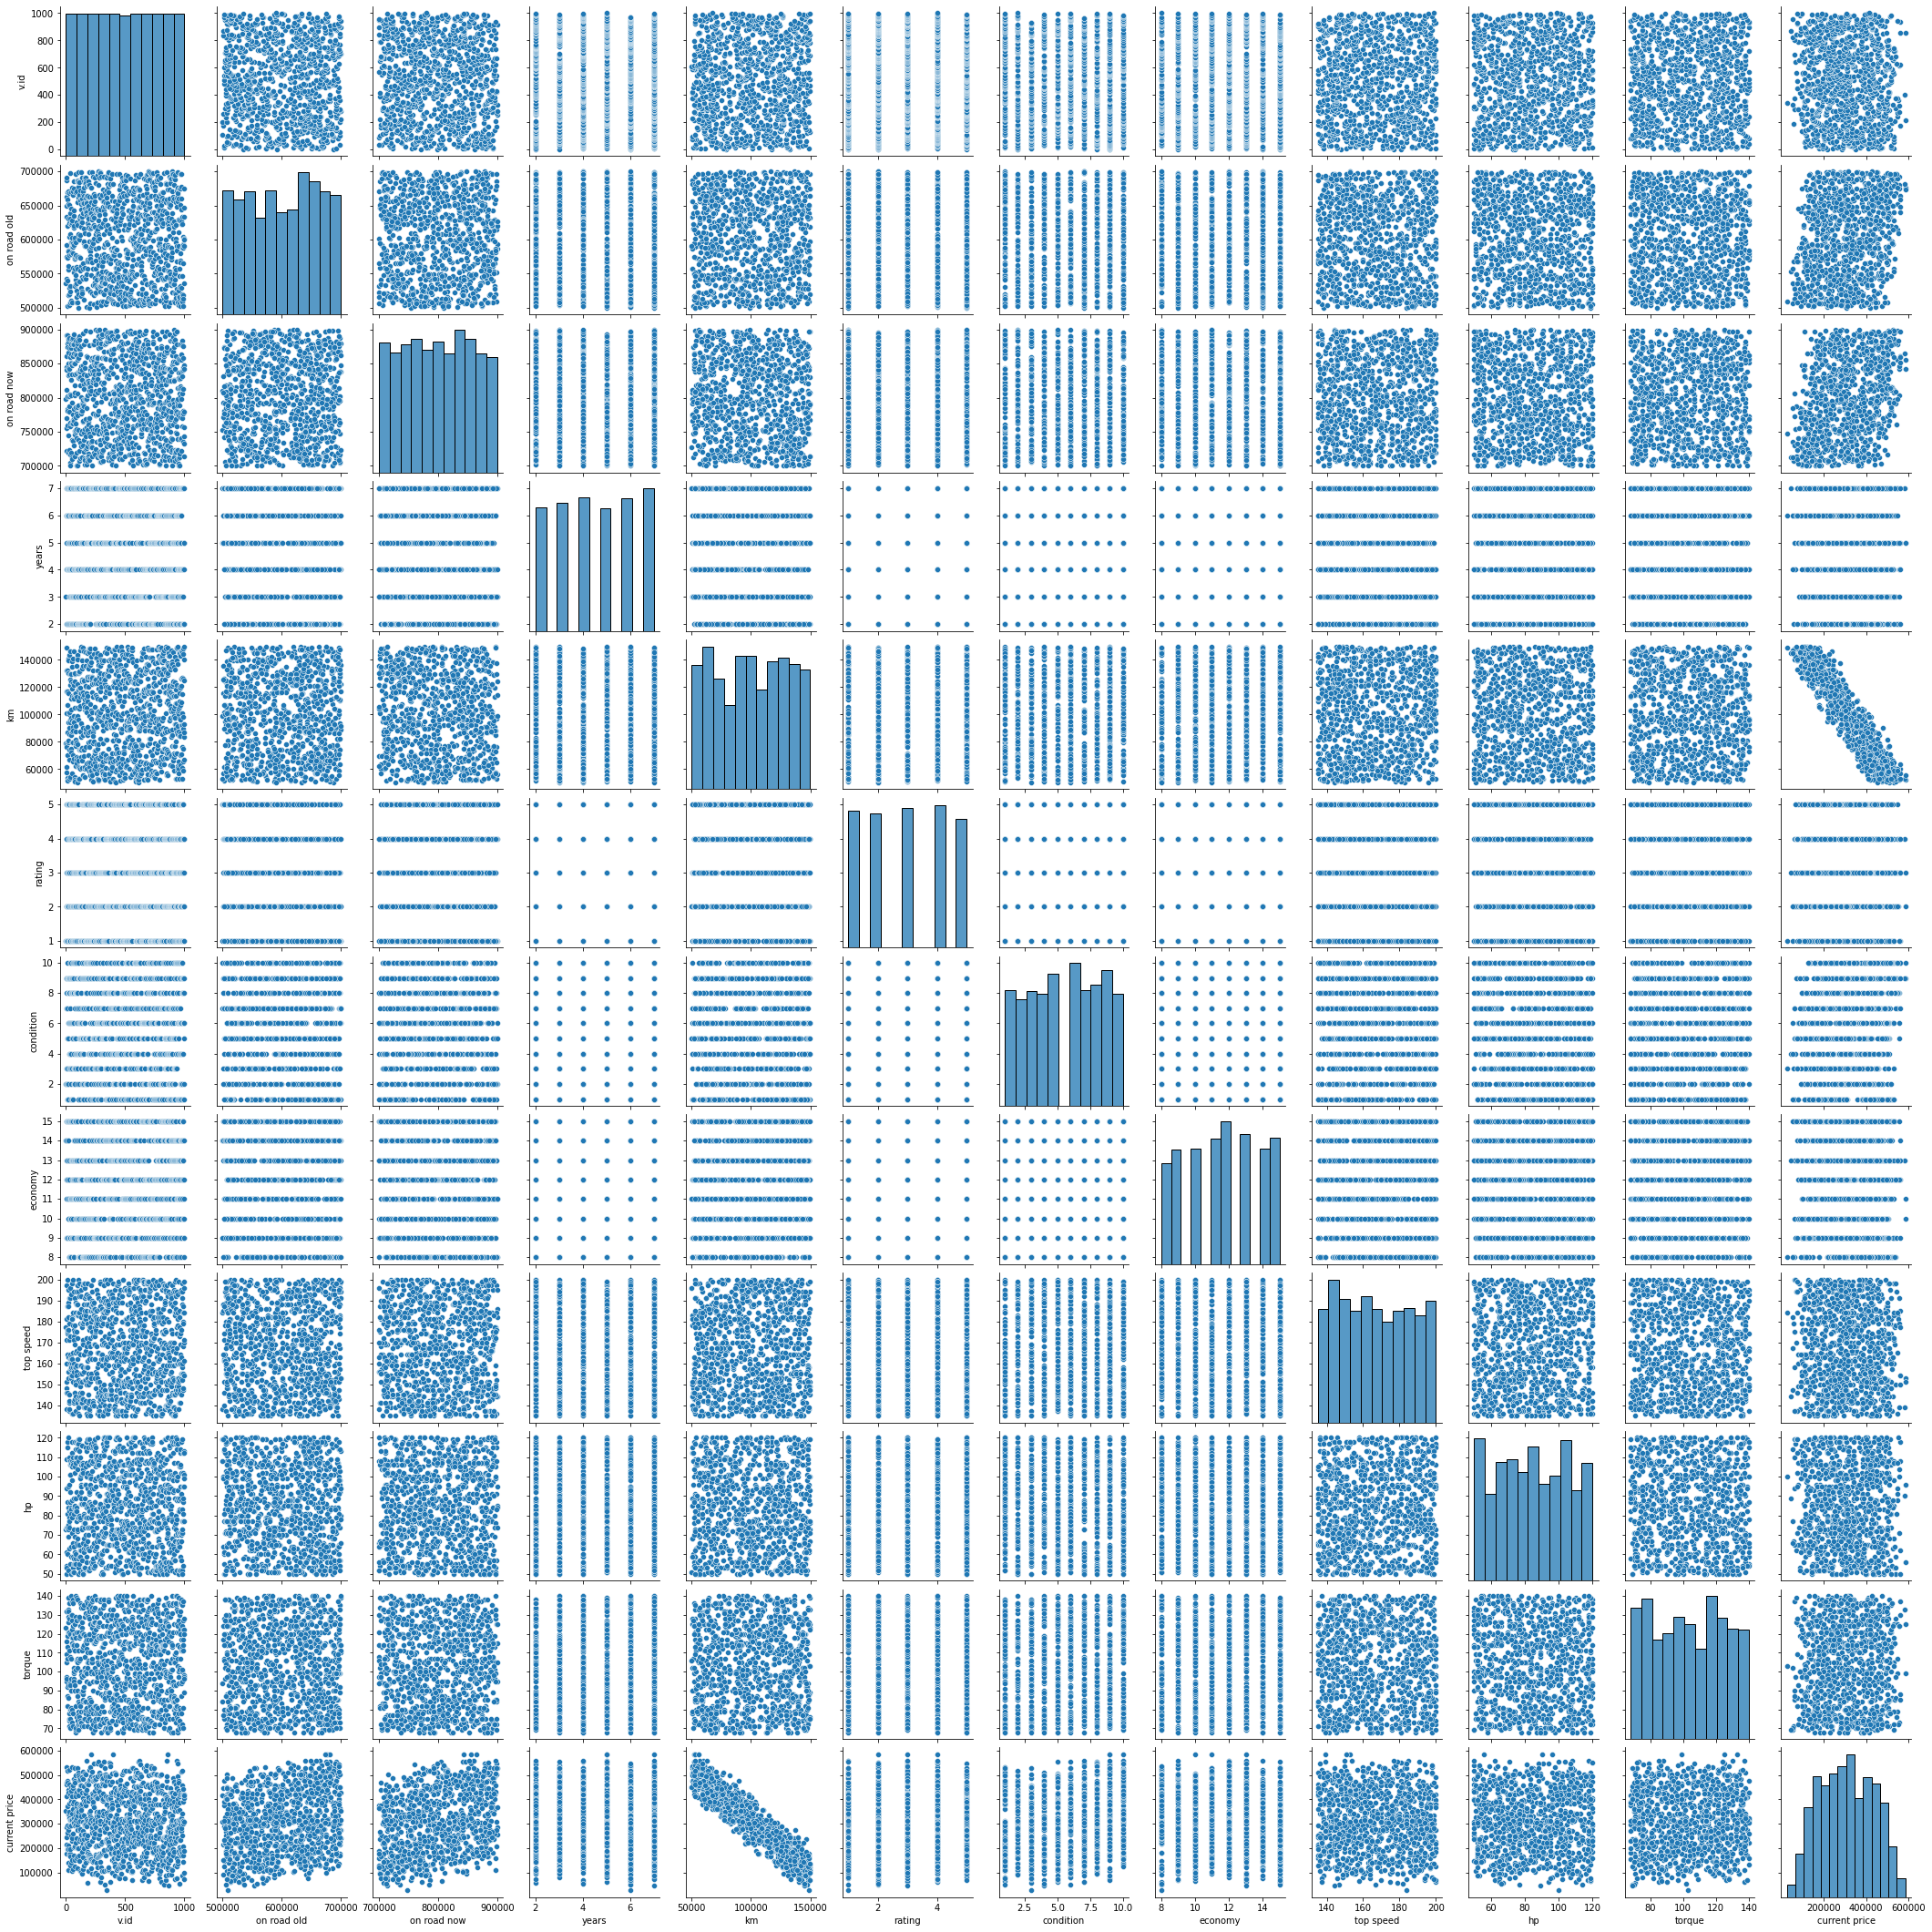

In [107]:
import seaborn as sns
sns.pairplot(df)

### By judging the pairplot it is clear that there is very less co-relation among all the columns

## Condition of a car Plot

In [108]:
fig = go.Figure([go.Bar(x=df['condition'], y=df['condition'].index, marker_line_color='rgb(80,48,7)')])
fig.show()

## Rating of a car Plot

In [109]:
fig = go.Figure([go.Bar(x=df['rating'], y=df['rating'].index, marker_line_color='rgb(80,48,7)')])
fig.show()

## Ecomony of a car Plot


In [110]:
fig = go.Figure([go.Bar(x=df['economy'], y=df['economy'].index, marker_line_color='rgb(80,48,7)')])
fig.show()

## Horsepower with Economy

In [111]:
fig = px.histogram(df, x="hp", color='economy')
fig.show()

## Current Price with Economy

In [112]:
fig = px.box(df, y="current price", color='economy',points = 'all')
fig.show()

## Torque with Rating plot

In [113]:
fig = px.violin(df, y="torque", color='rating',points = 'all', box=True)
fig.show()

## KM driven, Car Condition , rating with current price Plot

In [114]:


fig = px.scatter(df, x="km", y="current price",
	         size="condition", color="rating",
                 hover_name="years", log_x=True, size_max=60)
fig.show()

## Top Speed, Horsepower, Torque with Rating Plot

In [115]:
import plotly.express as px

fig = px.scatter_3d(df, x='top speed', y='hp', z='torque',
              color='rating')
fig.show()

## Multivariate Plot

In [116]:
fig = px.scatter_3d(df, x='on road old', y='on road now', z='current price',
              color='km', size='rating', size_max=18,
              symbol='condition', opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

## Heatmap

<AxesSubplot:>

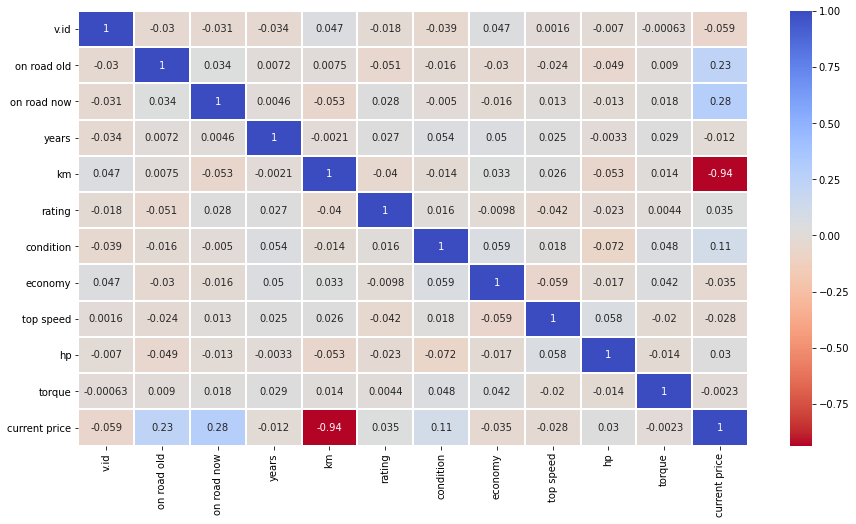

In [117]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(), annot= True, linewidth=1, cmap= "coolwarm_r")

## New car price vs Old car price Plot

In [118]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(y=df['on road old'], name='On Road Price Old',
                         line=dict(color='royalblue', width=3)))
fig.add_trace(go.Scatter(y=df['on road now'], name = 'On Road Price Now',
                         line=dict(color='firebrick', width=2)))


In [119]:
df.head()

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

# Dropping the ID column

In [120]:
df = df.drop(columns = 'v.id')

In [121]:
df.head()

on road old  on road now  years      km  rating  condition  economy  \
0       535651       798186      3   78945       1          2       14   
1       591911       861056      6  117220       5          9        9   
2       686990       770762      2  132538       2          8       15   
3       573999       722381      4  101065       4          3       11   
4       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

In [122]:
dff = df.copy()

# X and y Split

In [123]:
y = dff.pop("current price")
X = dff

In [124]:
X.head()

on road old  on road now  years      km  rating  condition  economy  \
0       535651       798186      3   78945       1          2       14   
1       591911       861056      6  117220       5          9        9   
2       686990       770762      2  132538       2          8       15   
3       573999       722381      4  101065       4          3       11   
4       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  
0        177  73     123  
1        148  74      95  
2        181  53      97  
3        197  54     116  
4        160  53     105

In [125]:
y.head()

0    351318.0
1    285001.5
2    215386.0
3    244295.5
4    531114.5
Name: current price, dtype: float64

In [126]:
X.shape, y.shape

((1000, 10), (1000,))

# Setting Random Regression

In [127]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=2000, random_state=1)

# Train Test Split

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(1600, 100) (400, 100)
(1600,) (400,)


# Feature Scaling

In [129]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building Multi-Layer Perceptron Regressor Model

In [130]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train, y_train)

C:\Users\KIIT\Anaconda3\envs\python 36 with tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



MLPRegressor(max_iter=500, random_state=1)

# Prediction for Test Set

In [131]:
y_pred = mlp.predict(X_test)
y_pred

array([ -15.23728241,  -20.6323514 ,  112.78008065,  233.03614378,
        312.39235152,  -68.76570828, -199.35845344,  140.43571057,
        106.69918538,   -7.90664696,   17.07269491,   37.14811277,
       -326.09642193,  -94.26983659,  128.21611342,   -5.14611734,
       -114.89041154,  -40.8135633 ,   67.70651089,  250.55485647,
       -320.51905644,  136.77995288,   55.97737826, -169.29389296,
        281.91600192,  -87.25778922,   90.76977659,  223.51630512,
        303.33560873,   20.35674025, -198.50339911,  -25.65699219,
         14.77670838,   71.20801907,  316.36536988,  -89.65697006,
         68.75084591,  127.02143442,   -2.97554522,  -70.51829355,
        -85.66745112,  238.21122821,  140.42028243, -220.62169929,
       -145.46907785,   48.43290956,   36.88724215,   77.37402585,
         63.80690948, -159.0034958 , -126.60282054, -254.02837171,
        -84.26607753,  381.71815259,   78.99003109,  280.84417695,
       -135.32285441,  157.47086039,  202.04015996, -254.18910

# Predicted Value vs Actual Value

In [132]:

data = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
data

array([[-1.52372824e+01, -2.01468974e+01],
       [-2.06323514e+01, -1.30168367e+01],
       [ 1.12780081e+02,  9.66849370e+01],
       [ 2.33036144e+02,  2.08352831e+02],
       [ 3.12392352e+02,  3.17202906e+02],
       [-6.87657083e+01, -5.89368268e+01],
       [-1.99358453e+02, -1.87336049e+02],
       [ 1.40435711e+02,  1.18581340e+02],
       [ 1.06699185e+02,  9.47928209e+01],
       [-7.90664696e+00, -2.26342703e+00],
       [ 1.70726949e+01,  3.37071901e+01],
       [ 3.71481128e+01,  3.26106398e+01],
       [-3.26096422e+02, -3.03318820e+02],
       [-9.42698366e+01, -8.93610146e+01],
       [ 1.28216113e+02,  1.34629900e+02],
       [-5.14611734e+00, -2.14718985e+01],
       [-1.14890412e+02, -1.20523138e+02],
       [-4.08135633e+01, -4.70358540e+01],
       [ 6.77065109e+01,  6.05893533e+01],
       [ 2.50554856e+02,  2.40580708e+02],
       [-3.20519056e+02, -3.18624802e+02],
       [ 1.36779953e+02,  1.34200012e+02],
       [ 5.59773783e+01,  4.89905648e+01],
       [-1.

# Model Performence Measurement 

In [133]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_tweedie_deviance

mse = mean_squared_error(y_test, y_pred)
print("MSE Score :", mse)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, y_pred)
print("R2 Score :",r2_score)

max_error = max_error(y_test, y_pred)
print("Max Error :",max_error)

mean_absolute_error = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mean_absolute_error)



median_absolute_error = median_absolute_error(y_test, y_pred)
print("Median Absolute Error :",median_absolute_error)



mean_tweedie_deviance = mean_tweedie_deviance(y_test, y_pred)
print("Mean Tweedie Deviance :",mean_tweedie_deviance)



MSE Score : 181.70968185478054
RMSE Score : 13.479973362539726
R2 Score : 0.993760052208976
Max Error : 48.941621629963436
Mean Absolute Error : 10.578265518317549
Median Absolute Error : 8.94284242222307
Mean Tweedie Deviance : 181.70968185478054


# Final Accuracy

In [134]:
acc = r2_score*100
print("Model Accuracy : ",round(acc,4),"%")

Model Accuracy :  99.376 %


In [135]:
dataset = pd.DataFrame({'y_test': data[:, 0], 'y_pred': data[:, 1]})
dataset.to_csv('accuracy.csv')

In [136]:
dataset = pd.read_csv('accuracy.csv')

In [137]:
dataset.head()

Unnamed: 0      y_test      y_pred
0           0  -15.237282  -20.146897
1           1  -20.632351  -13.016837
2           2  112.780081   96.684937
3           3  233.036144  208.352831
4           4  312.392352  317.202906

# Actual Price vs Predicted Price of an Used Car Plot

In [138]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=dataset['Unnamed: 0'], y=dataset['y_test'], name='Actual Price',
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=dataset['Unnamed: 0'], y=dataset['y_pred'], name = 'Predicted Price',
                         line=dict(color='firebrick', width=2)))


## This Model can Successfully Predict Price of an Used Car with an Accuracy of 99%